In [3]:
!pwd

/home/robe1095/CMSE202/projects/CMSE202-f23-003-group9


In [4]:
!git branch

* Jack
  main


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
nhl = pd.read_csv('Stanley Cup Data - project_dataset.csv')
nhl = nhl.drop(columns = ['Team'])
nhl = nhl.drop(columns = ['Season Start'])
nhl = nhl.drop(columns = ['Season End'])
nhl = nhl.drop(columns = ['T'])
nhl = nhl.drop(columns = ['OT'])
nhl = nhl.drop(columns = ['S/O Win'])


nhl

,GP,W,L,P,P%,RW,ROW,GF,GA,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%,Stanley Cup,Presidents Cup
0,82,23,47,58,0.354,13,20,206,335,2.51,4.09,15.7,72.1,12.7,72.5,28.4,39.1,46.7,0,0
1,82,28,40,70,0.427,20,25,225,295,2.74,3.60,18.9,74.6,16.4,76.2,25.8,35.0,45.9,0,0
2,82,65,12,135,0.823,54,61,301,174,3.67,2.12,22.2,87.3,19.4,90.1,33.0,29.8,54.5,0,1
3,82,42,33,91,0.555,30,39,293,297,3.57,3.62,23.4,73.0,20.8,77.0,32.5,33.0,45.1,0,0
4,82,38,27,93,0.567,31,36,258,247,3.15,3.01,19.8,82.6,17.5,85.6,36.0,27.3,50.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,82,37,32,87,0.530,36,37,237,209,2.89,2.55,20.3,87.9,18.9,89.7,30.1,22.8,52.2,0,0
719,82,19,54,47,0.287,18,19,179,292,2.18,3.56,13.9,82.4,10.7,85.3,26.0,32.1,47.1,0,0
720,82,45,30,97,0.591,39,45,268,231,3.27,2.82,14.4,80.3,12.8,82.5,28.3,28.8,50.0,0,0
721,82,23,47,58,0.354,23,23,192,258,2.34,3.15,15.9,82.9,13.4,86.7,23.7,29.4,50.2,0,0


In [3]:
#create separate dataframes for labels
stanley = nhl['Stanley Cup']

president = nhl['Presidents Cup']


In [4]:
stanley.value_counts()

0    699
1     24
Name: Stanley Cup, dtype: int64

In [5]:
president.value_counts()

0    699
1     24
Name: Presidents Cup, dtype: int64

In [6]:
#final features dataframe
nhl1 = nhl.drop(columns = ['Presidents Cup'])

nhl1 = nhl1.drop(columns = ['Stanley Cup'])

In [7]:
nhl1

,GP,W,L,P,P%,RW,ROW,GF,GA,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%
0,82,23,47,58,0.354,13,20,206,335,2.51,4.09,15.7,72.1,12.7,72.5,28.4,39.1,46.7
1,82,28,40,70,0.427,20,25,225,295,2.74,3.60,18.9,74.6,16.4,76.2,25.8,35.0,45.9
2,82,65,12,135,0.823,54,61,301,174,3.67,2.12,22.2,87.3,19.4,90.1,33.0,29.8,54.5
3,82,42,33,91,0.555,30,39,293,297,3.57,3.62,23.4,73.0,20.8,77.0,32.5,33.0,45.1
4,82,38,27,93,0.567,31,36,258,247,3.15,3.01,19.8,82.6,17.5,85.6,36.0,27.3,50.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,82,37,32,87,0.530,36,37,237,209,2.89,2.55,20.3,87.9,18.9,89.7,30.1,22.8,52.2
719,82,19,54,47,0.287,18,19,179,292,2.18,3.56,13.9,82.4,10.7,85.3,26.0,32.1,47.1
720,82,45,30,97,0.591,39,45,268,231,3.27,2.82,14.4,80.3,12.8,82.5,28.3,28.8,50.0
721,82,23,47,58,0.354,23,23,192,258,2.34,3.15,15.9,82.9,13.4,86.7,23.7,29.4,50.2


In [8]:
#split the data
X_train, X_test, stanley_train, stanley_test = train_test_split(nhl1, stanley, test_size=0.25, random_state = 77)

In [9]:
#perform a grid search to find the best hyperparameters
param_grid = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0, 1e4],
              'gamma': [1e-4, 1e-3, 0.01, 0.1, 1.0, 10.0],
              'kernel': ['linear', 'rbf']}

svc_model = SVC()

grid_search = GridSearchCV(svc_model, param_grid) 

grid_search.fit(X_train, stanley_train)

print(grid_search.best_params_)


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}


In [17]:
#train the model
stanley_svm = SVC(kernel = 'linear', C = 0.1, gamma = 0.0001)
stanley_svm.fit(X_train, stanley_train)

SVC(C=0.1, gamma=0.0001, kernel='linear')

In [18]:
#predictions
stanley_pred = stanley_svm.predict(X_test)


In [30]:
accuracy = accuracy_score(stanley_test, stanley_pred)

# Classification Report
#report = classification_report(stanley_test, stanley_pred)
accuracy

0.9502762430939227

Chat GPT helped me create these confusion matrixes using seaborn. Accessed from openai.com 12/1/2023. Prompt: Help me to create visuals for my SVM findings.

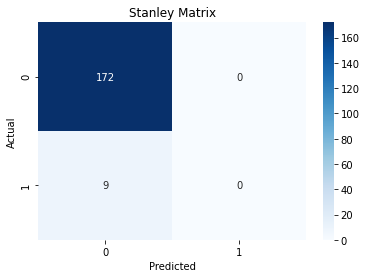

In [27]:

s_conf_matrix = confusion_matrix(stanley_test, stanley_pred)

# Plot the confusion matrix
sns.heatmap(s_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stanley Matrix')
plt.show()

In [5]:
#repeat the process for president's cup
#split the data
X_train, X_test, president_train, president_test = train_test_split(nhl1, president, test_size=0.25, random_state = 77)

In [6]:
#perform a grid search to find the best hyperparameters
param_grid = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0, 1e4],
              'gamma': [1e-4, 1e-3, 0.01, 0.1, 1.0, 10.0],
              'kernel': ['linear', 'rbf']}

svc_model = SVC()

grid_search = GridSearchCV(svc_model, param_grid) 

grid_search.fit(X_train, president_train)

print(grid_search.best_params_)


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}


In [8]:
#train the model
president_svm = SVC(kernel = 'linear', C = 0.1, gamma = 0.0001)
president_svm.fit(X_train, president_train)

SVC(C=0.1, gamma=0.0001, kernel='linear')

In [10]:
#predictions
president_pred = president_svm.predict(X_test)

In [23]:
accuracy = accuracy_score(president_test, president_pred)

# Classification Report
report = classification_report(president_test, president_pred)


In [24]:
accuracy

0.9834254143646409

In [25]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99       177\n           1       0.57      1.00      0.73         4\n\n    accuracy                           0.98       181\n   macro avg       0.79      0.99      0.86       181\nweighted avg       0.99      0.98      0.99       181\n'

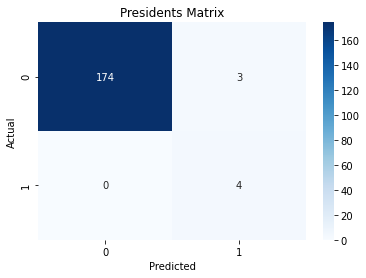

In [26]:
p_conf_matrix = confusion_matrix(president_test, president_pred)

# Plot the confusion matrix
sns.heatmap(p_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Presidents Matrix')
plt.show()